# TRAPPIST1 Simulation
#### *Using the open-access REBOUND package* 
#### *Last Update: 6, June 2021*

## Simulation Set-Up

In [24]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DEFAULT REBOUND UNITS. G = 1 / mass in Msun / distance in AU / time in year/(2pi)

sim = rebound.Simulation()
sim.integrator = "mercurius"
sim.dt = 0.000206968604*2*np.pi # in default units, 1 year = 2pi. Here the time step is ~
sim.testparticle_type = 1 # set planetesimals to semi-active mode
sim.ri_ias15.min_dt = 1e-6 # ensure that close encounters do not stall the integration. This sets a minimal time step 
                           # for IAS15. 
    
sim.collision = "direct"
sim.collision_resolve = "merge" # merge any planetesimals that collide with a planet, conserving momentum and mass
#sim.collision_resolve_keep_sorted = 1 # keep particles sorted if collision_resolve removes particles during a collision.


sim.boundary = "open" # open boundary conditions. Remove particle if they leave the box (are ejected from system)
#boxsize = 0.0100003232
boxsize = 1.2
sim.configure_box(boxsize)

sim.track_energy_offset = 1 # track the energy lost due to ejections and collisions

## Star & Planet Orbital Parameters
#### *Based off Agol et al., 2021*

In [25]:
mEarth = 3e-6 # Earth mass in units of Msun
rEarth = 4.25e-5 # Earth radius in units of AU 

## all values dervied from Agol et al. True anomalies assuming perfectly circular orbits 
sim.add(m=.0898)
sim.add(m=1.374*mEarth, r=1.116*rEarth, a=0.01154, e=0.00305473, omega=2.35156489, f=1.62005, inc=0.004747296) # Trappist1b
sim.add(m=1.308*mEarth, r=1.097*rEarth, a=0.01580, e=0.00055009, omega=0.01817982, f=4.448437, inc=0.003874631) # Trappist1c
sim.add(m=0.388*mEarth, r=.788*rEarth, a=0.02227, e=0.00563298, omega=2.64777152, f=5.293947, inc=0.001815142) #Trappist1d
sim.add(m=0.692*mEarth, r=.920*rEarth, a=0.02925, e=0.00632463, omega=0.81670784, f=2.183237, inc=0.003612832) #Trappist1e
sim.add(m=1.039*mEarth, r=1.045*rEarth, a=0.03849, e=0.00841547, omega=0.06063985, f=5.09579, inc=0.004537856) #Trappist1f
sim.add(m=1.321*mEarth, r=1.129*rEarth, a=0.04683, e=0.00400979, omega=0.32490512, f=4.12414, inc=0.004502949) #Trappist1g
sim.add(m=0.326*mEarth, r=0.755*rEarth, a=0.06189, e=0.00365005, omega=0.0054794, f= 4.7124, inc=0.003403392) #Trappist1h

mTrappistH=0.326*mEarth
aTrappistH = 0.06189

mSun=.0898

hillRadiusH = aTrappistH * (mTrappistH / mSun) ** (1/3)

sim.N_active = 8 # declares amount of active bodies in the system. All other bodies added after are semi-active

## Planetesimal Orbital Parameters
#### *Distributions adapted from examples on REBOUND website*

In [26]:
def rand_powerlaw(slope, min_v, max_v):
    y = np.random.uniform()
    pow_max = pow(max_v, slope+1.)
    pow_min = pow(min_v, slope+1.)
    return pow((pow_max-pow_min)*y + pow_min, 1./(slope+1.))

def rand_uniform(minimum, maximum):
    return np.random.uniform()*(maximum-minimum)+minimum

def rand_rayleigh(sigma):
    return sigma*np.sqrt(-2*np.log(np.random.uniform()))

N_pl = 100 # number of planetesimals 
m_pl = mEarth*(1e-5) # mass of each planetesimal
r_pl = 1.00446e-6 # radius of each planetesimal 

np.random.seed(42) # by setting a seed we will reproduce the same simulation every time (easier for debugging)
while sim.N < (N_pl + sim.N_active):
    a = rand_powerlaw(0, aTrappistH + hillRadiusH, aTrappistH + hillRadiusH + .005)  
    e = rand_rayleigh(0.01)
    inc = rand_rayleigh(0.005)
    f = rand_uniform(-np.pi,np.pi)
    p = rebound.Particle(simulation=sim,primary=sim.particles[0],m=m_pl, r=r_pl, a=a, e=e, inc=inc, Omega=0, omega=0, f=f)
    # Only add planetesimal if it's far away from the planet
    d = np.linalg.norm(np.array(p.xyz)-np.array(sim.particles[1].xyz))
    if d>0.01:
        sim.add(p)

In [27]:
sim.move_to_com() # Move system to Center of Mass reference frame

## Integration

Particles in the simulation at t=   0.0: 108
Sun and Planet Mass: [0.0898, 4.1220000000000005e-06, 3.924e-06, 1.164e-06, 2.0759999999999997e-06, 3.117e-06, 3.963e-06, 9.78e-07]
Total System Mass: 0.08981934700000024
Particles in the simulation at t=10472.0: 53
Sun and Planet Mass: [0.0898, 4.1220000000000005e-06, 3.924e-06, 1.164e-06, 2.0760299999999997e-06, 3.11718e-06, 3.963300000000004e-06, 9.791399999999993e-07]
Total System Mass: 0.08981934700000012
Particles in the simulation at t=20944.0: 37
Sun and Planet Mass: [0.0898, 4.1220000000000005e-06, 3.924e-06, 1.16403e-06, 2.0760599999999997e-06, 3.11718e-06, 3.963420000000006e-06, 9.79439999999999e-07]
Total System Mass: 0.08981934700000008
Particles in the simulation at t=31415.9: 29
Sun and Planet Mass: [0.0898, 4.1220000000000005e-06, 3.924e-06, 1.16403e-06, 2.0760899999999996e-06, 3.11718e-06, 3.963450000000006e-06, 9.79619999999999e-07]
Total System Mass: 0.08981934700000005


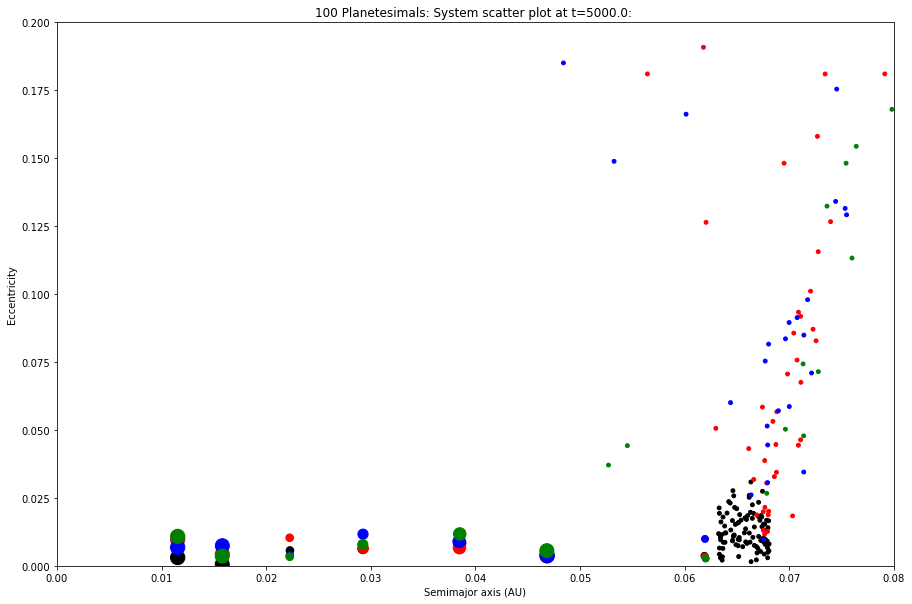

In [28]:
color = ['black', 'red', 'blue', 'green'] # Set up color indices for scatter plots created at each time step. 
                                          # Here, using 4 timesteps, therefore need 4 colors. 

# Create array that will store orbital information for all bodies
xy = np.zeros((4, N_pl+7, 5)) # First value = number of timesteps, Third value = # of orbital parameters
times = np.linspace(0.,5000*2*np.pi,4) # Create timesteps

plt.figure(figsize=(15,10))

for i,t in enumerate(times):
        
    sim.integrate(t,exact_finish_time=0)
        
    print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
    massStart = 0
    for p in sim.particles: 
        massStart += p.m
    print("Sun and Planet Mass: {}".format([p.m for p in sim.particles][0:8]))
    print("Total System Mass: " + str(massStart))
    
    semimajorAxis = []
    eccentricity = []
    mass = []
    
    for j,p in enumerate(sim.particles[1:]):
        xy[i][j] = [p.m,p.a,p.e,p.omega,p.inc]
        semimajorAxis.append(p.a)
        eccentricity.append(p.e)
        
        if p.m <= mEarth*(1e-5):
            mass.append(p.m * 500000000000)
        else: 
            mass.append(p.m * 50000000)
    
    plt.scatter(x = semimajorAxis, y = eccentricity, s = mass, c=color[i])
    plt.xlim(0, .08)
    plt.ylim(0, .2)
    plt.title("100 Planetesimals: System scatter plot at t=%6.1f: "%((sim.t)/2/np.pi))
    plt.xlabel("Semimajor axis (AU)")
    plt.ylabel("Eccentricity")

    plt.savefig('%s.jpg'%(sim.t),bbox_inches='tight', dpi=150)

## Output Data Text File
#### *Transport orbital parameter data at each timestep. Will create .txt file ouputData in code location, or overwrite outputData.txt if it already exists* 

In [29]:
f = open("outputData.txt", "a")
i = -1
for timestep in xy: 
    i += 1
    j = -1
    for planetesimal in timestep:
        print(times[i], str(j+1), str(planetesimal[0]), str(planetesimal[1]), str(planetesimal[2]), 
              str(planetesimal[3]), str(planetesimal[4]), file=f, end = '\n')
        j += 1
f.close()       